this section is about correlating delays with flight information (airlines, airport, distance)

here is a rough list of some findings:
- arrival and departure delays have a big range (0 - 3000 minutes)
- there are 10 airlines total in the flight data, but there is a huge gap in number of flights using the top 4 to the bottom 6 airlines
 - however, in terms of delays, the % of flights delayed for each airline is similar across all 10 (4-10%)
  - same for each airport arrival/destination and flight distance
- there seems to be no correlation between distance and delay TYPE
- high correlation in map for:
  -  arrival and departure delay (which makes sense)
- airline 19690 known for carrier delay, has significantly less NAS delay than all other airlines
- destination airport 14771 has a significant amount more of NAS delays then all other "top 10 airports with delays"





In [ ]:
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install matplotlib
!pip install scikit-learn
!pip install scipy
!pip install gdown

In [ ]:
# Import portion of a package
import matplotlib.pyplot as plt  # Most common visualization package that a lot of others are based on

# Import full packages under custom name
import numpy as np  # Common package for numerical methods
import pandas as pd  # Common package for data storeage/manipulation
import seaborn as sns  # Common package for statistical visualizations

# Import portion of a package
import scipy.stats as stats
from sklearn.impute import SimpleImputer as Imputer  # Specific function from common machine learning package\

#more packages
import gdown

In [ ]:
# File ID from your link
file_id = "13elVDJJ6JUH2gsj36CxPjkLryE2rnl-r"
url = f"https://drive.google.com/uc?id={file_id}"

# Download the file
gdown.download(url, "flight_data.csv", quiet=False)

# Now load it
flight_data = pd.read_csv("flight_data.csv")
print(flight_data.shape)
print(flight_data.head())


Downloading...
From (original): https://drive.google.com/uc?id=13elVDJJ6JUH2gsj36CxPjkLryE2rnl-r
From (redirected): https://drive.google.com/uc?id=13elVDJJ6JUH2gsj36CxPjkLryE2rnl-r&confirm=t&uuid=39461123-1918-4f12-8540-924280ad404e
To: /content/flight_data.csv
100%|██████████| 1.32G/1.32G [00:14<00:00, 92.3MB/s]


(7546988, 32)
   YEAR  QUARTER  MONTH  DAY_OF_MONTH  DAY_OF_WEEK  MKT_CARRIER_AIRLINE_ID  \
0  2024        1      1             1            1                   19393   
1  2024        1      1             1            1                   19393   
2  2024        1      1             1            1                   19393   
3  2024        1      1             1            1                   19393   
4  2024        1      1             1            1                   19393   

   ORIGIN_AIRPORT_ID  ORIGIN_AIRPORT_SEQ_ID ORIGIN_CITY_NAME  DEST_AIRPORT_ID  \
0              10140                1014005  Albuquerque, NM            10423   
1              10140                1014005  Albuquerque, NM            10423   
2              10140                1014005  Albuquerque, NM            10800   
3              10140                1014005  Albuquerque, NM            10821   
4              10140                1014005  Albuquerque, NM            11259   

   ...  CANCELLATION_CODE CRS_

In [ ]:
"""

initial analysis on delays, distance and time of flights. didn't do mean/box plot numbers for airline because they are numbered and averaging them wouldn't make sense.

"""



flight_data[['DEP_TIME','DEP_DEL15', 'ARR_DELAY_NEW', 'DEP_DELAY_NEW','ARR_TIME', 'ARR_DEL15', 'ACTUAL_ELAPSED_TIME','DISTANCE']].describe().round(4)


,DEP_TIME,DEP_DEL15,ARR_DELAY_NEW,DEP_DELAY_NEW,ARR_TIME,ARR_DEL15,ACTUAL_ELAPSED_TIME,DISTANCE
count,7.448053e+06,7.447743e+06,7.444080e+06,7.447743e+06,7.442461e+06,7.444080e+06,7.444080e+06,7.546988e+06
mean,1.330762e+03,2.035000e-01,1.591770e+01,1.589580e+01,1.462144e+03,2.066000e-01,1.384101e+02,8.063299e+02
std,5.066645e+02,4.026000e-01,5.513970e+01,5.530700e+01,5.418492e+02,4.049000e-01,7.171910e+01,5.906497e+02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.500000e+01,1.100000e+01
25%,9.100000e+02,0.000000e+00,0.000000e+00,0.000000e+00,1.047000e+03,0.000000e+00,8.600000e+01,3.730000e+02
50%,1.325000e+03,0.000000e+00,0.000000e+00,0.000000e+00,1.503000e+03,0.000000e+00,1.210000e+02,6.490000e+02
75%,1.744000e+03,0.000000e+00,9.000000e+00,9.000000e+00,1.917000e+03,0.000000e+00,1.690000e+02,1.045000e+03
max,2.400000e+03,1.000000e+00,3.803000e+03,3.777000e+03,2.400000e+03,1.000000e+00,2.174000e+03,5.095000e+03


<Axes: title={'center': 'Top Destination Airports'}, xlabel='DEST_AIRPORT_ID'>

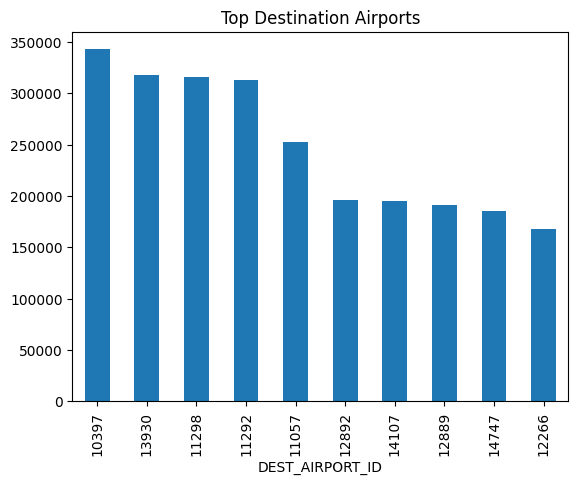

In [ ]:

# Top destination airports
flight_data['DEST_AIRPORT_ID'].value_counts().head(10).plot(kind='bar', title='Top Destination Airports')

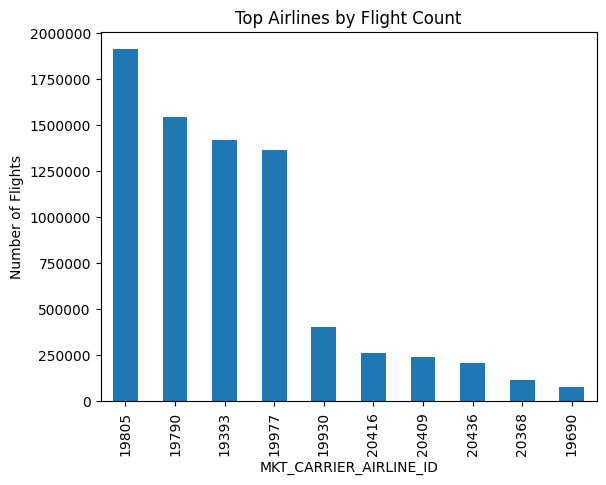

In [ ]:
"""
this shows that the top 4 airlines do much more flights than the bottom 6 - maybe worth eliminating the bottom 6?


"""


#Top airlines
ax = flight_data['MKT_CARRIER_AIRLINE_ID'].value_counts().head(10).plot(
    kind='bar',
    title='Top Airlines by Flight Count'
)
ax.ticklabel_format(style='plain', axis='y')  # <-- disables scientific notation
plt.ylabel('Number of Flights')
plt.show()

<Axes: title={'center': 'Top Origin Airports'}, xlabel='ORIGIN_AIRPORT_ID'>

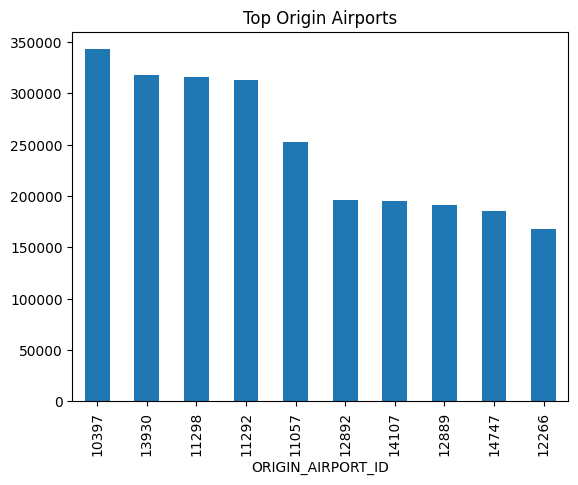

In [ ]:

# Top origin airports
flight_data['ORIGIN_AIRPORT_ID'].value_counts().head(10).plot(kind='bar', title='Top Origin Airports')


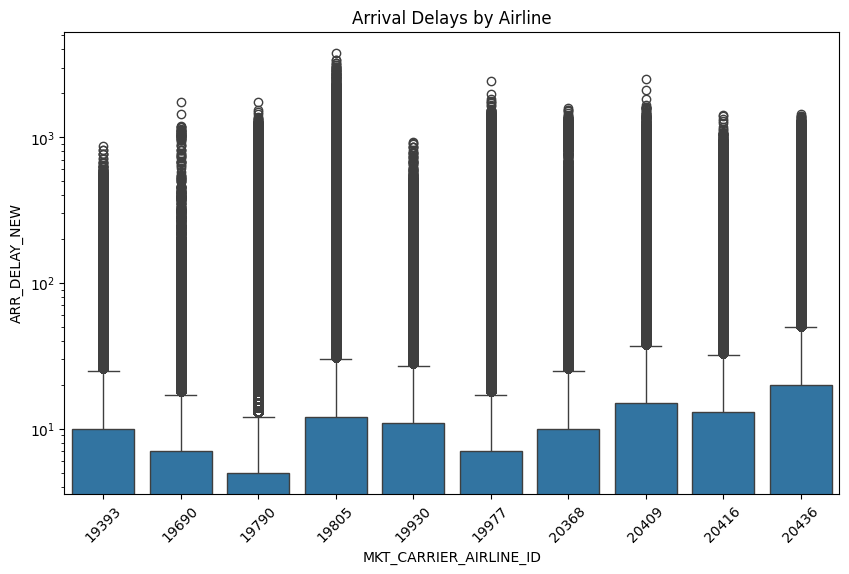

In [ ]:
# Boxplot by airline
plt.figure(figsize=(10,6))
sns.boxplot(data=flight_data, x='MKT_CARRIER_AIRLINE_ID', y='ARR_DELAY_NEW')
plt.title('Arrival Delays by Airline')
plt.yscale('log')
plt.xticks(rotation=45)
plt.show()

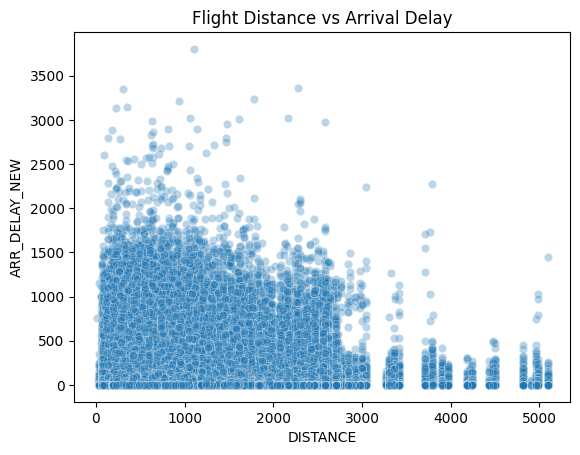

In [ ]:
sns.scatterplot(data=flight_data, x='DISTANCE', y='ARR_DELAY_NEW', alpha=0.3)
plt.title('Flight Distance vs Arrival Delay')
plt.show()

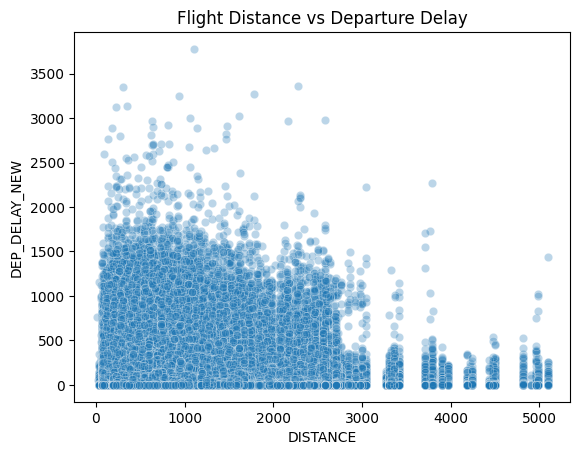

In [ ]:
sns.scatterplot(data=flight_data, x='DISTANCE', y='DEP_DELAY_NEW', alpha=0.3)
plt.title('Flight Distance vs Departure Delay')
plt.show()

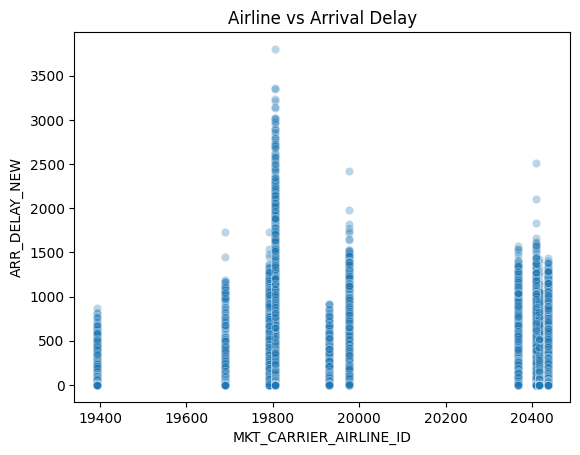

In [ ]:
sns.scatterplot(data=flight_data, x='MKT_CARRIER_AIRLINE_ID', y='ARR_DELAY_NEW', alpha=0.3)
plt.title('Airline vs Arrival Delay')
plt.show()

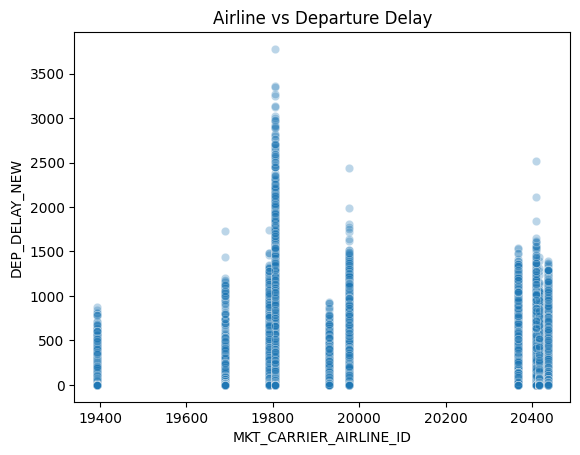

In [ ]:
sns.scatterplot(data=flight_data, x='MKT_CARRIER_AIRLINE_ID', y='DEP_DELAY_NEW', alpha=0.3)
plt.title('Airline vs Departure Delay')
plt.show()

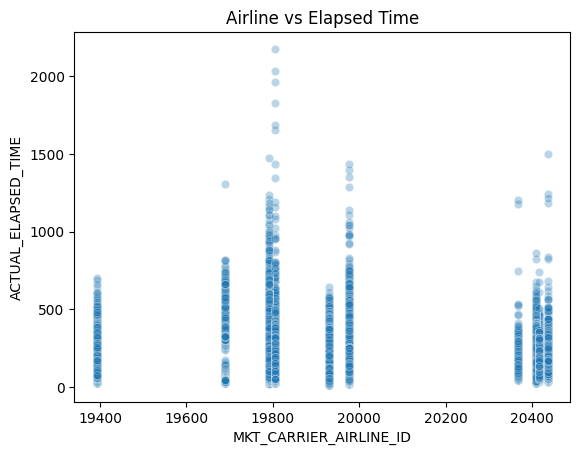

In [ ]:
sns.scatterplot(data=flight_data, x='MKT_CARRIER_AIRLINE_ID', y='ACTUAL_ELAPSED_TIME', alpha=0.3)
plt.title('Airline vs Elapsed Time')
plt.show()

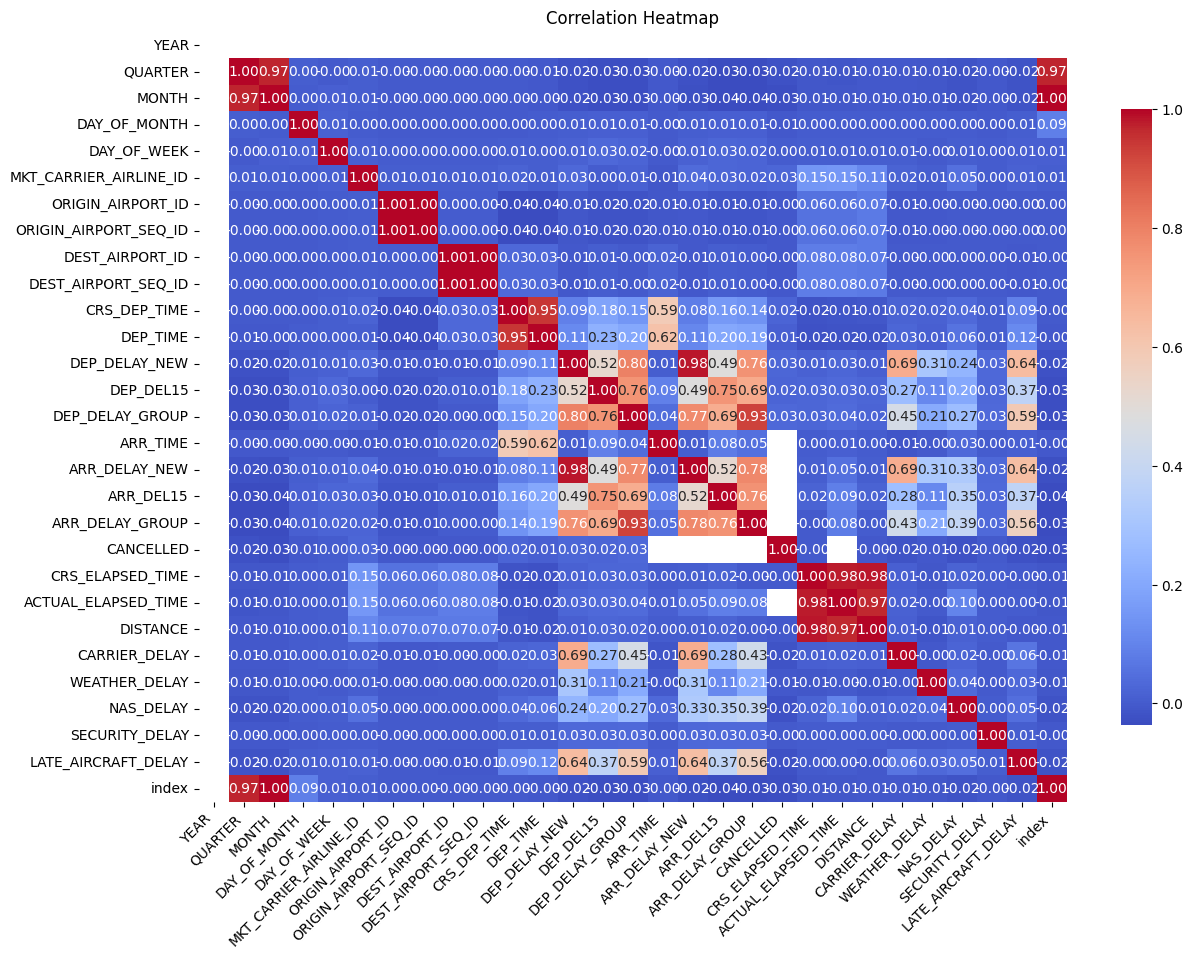

In [ ]:
plt.figure(figsize=(14, 10))
corr = flight_data.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'shrink': 0.8})
plt.title('Correlation Heatmap')
plt.xticks(rotation=45, ha='right')
plt.show()

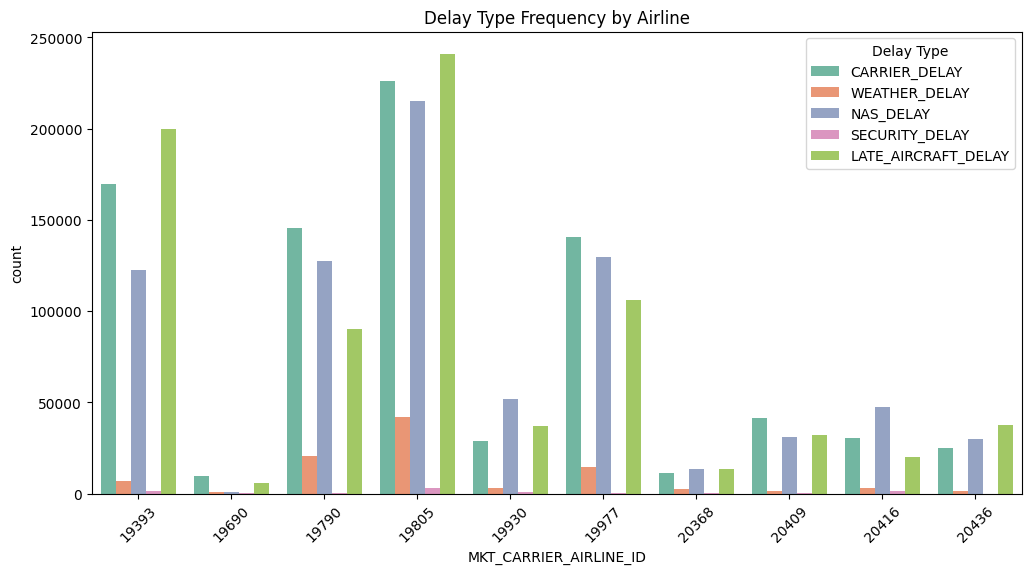

In [ ]:
delay_cols = ['CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']


delay_long = flight_data.melt(
    id_vars=['MKT_CARRIER_AIRLINE_ID', 'DISTANCE', 'ORIGIN_AIRPORT_ID', 'DEST_AIRPORT_ID', 'ACTUAL_ELAPSED_TIME'],
    value_vars=delay_cols,
    var_name='DELAY_TYPE',
    value_name='DELAY_MINUTES'
)

delay_long['HAS_DELAY'] = (delay_long['DELAY_MINUTES'] > 0).astype(int)

plt.figure(figsize=(12,6))
sns.countplot(
    data=delay_long[delay_long['HAS_DELAY'] == 1],
    x='MKT_CARRIER_AIRLINE_ID',
    hue='DELAY_TYPE',
    palette='Set2'
)
plt.title('Delay Type Frequency by Airline')
plt.xticks(rotation=45)
plt.legend(title='Delay Type')
plt.show()

/tmp/ipython-input-3075236301.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


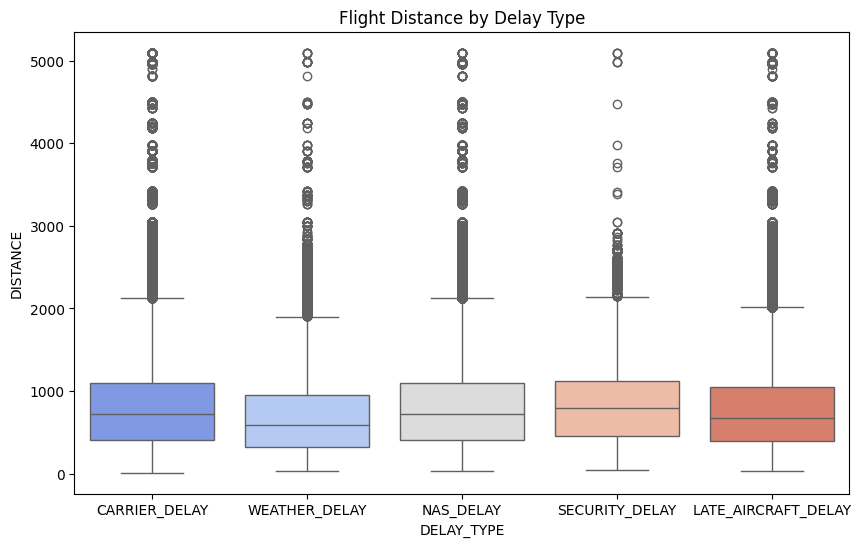

In [ ]:
"""

there doesnt seem to be correlation between flight distance and delay type besides there arent as many security delays
in long flights compared to other (but there are also less security delays in general)

"""


plt.figure(figsize=(10,6))
sns.boxplot(
    data=delay_long[delay_long['HAS_DELAY'] == 1],
    x='DELAY_TYPE',
    y='DISTANCE',
    palette='coolwarm'
)
plt.title('Flight Distance by Delay Type')
plt.show()

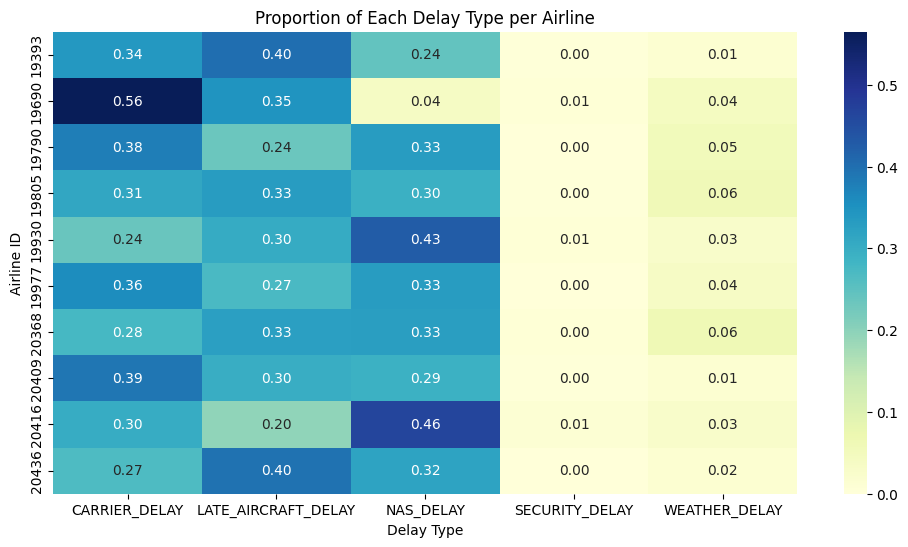

In [ ]:
"""
seems like airline 19690 known for carrier delay, has significantly less NAS delay than all other airlines
"""

pivot_norm = pivot.div(pivot.sum(axis=1), axis=0)

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_norm, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Proportion of Each Delay Type per Airline")
plt.ylabel("Airline ID")
plt.xlabel("Delay Type")

plt.show()

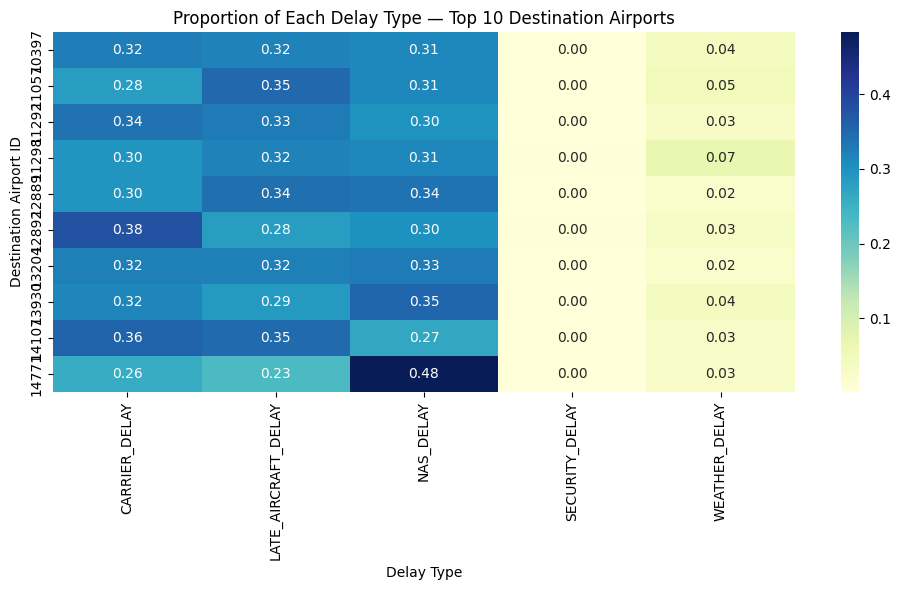

In [ ]:
# Step 1: find airports with the most total delays
top_dest = (
    delay_long[delay_long['HAS_DELAY'] == 1]
    .groupby('DEST_AIRPORT_ID')['HAS_DELAY']
    .sum()
    .nlargest(10)  # change this number to show more/less
    .index
)

# Step 2: make a pivot table only for those airports
pivot_dest_top = (
    delay_long[
        (delay_long['HAS_DELAY'] == 1) &
        (delay_long['DEST_AIRPORT_ID'].isin(top_dest))
    ]
    .pivot_table(
        index='DEST_AIRPORT_ID',
        columns='DELAY_TYPE',
        values='HAS_DELAY',
        aggfunc='sum',
        fill_value=0
    )
)

# Step 3: convert to proportions (row-wise normalization)
pivot_dest_prop = pivot_dest_top.div(pivot_dest_top.sum(axis=1), axis=0)

# Step 4: plot the proportion heatmap
plt.figure(figsize=(10,6))
sns.heatmap(pivot_dest_prop, annot=True, fmt='.2f', cmap='YlGnBu')
plt.title('Proportion of Each Delay Type — Top 10 Destination Airports')
plt.ylabel('Destination Airport ID')
plt.xlabel('Delay Type')
plt.tight_layout()
plt.show()

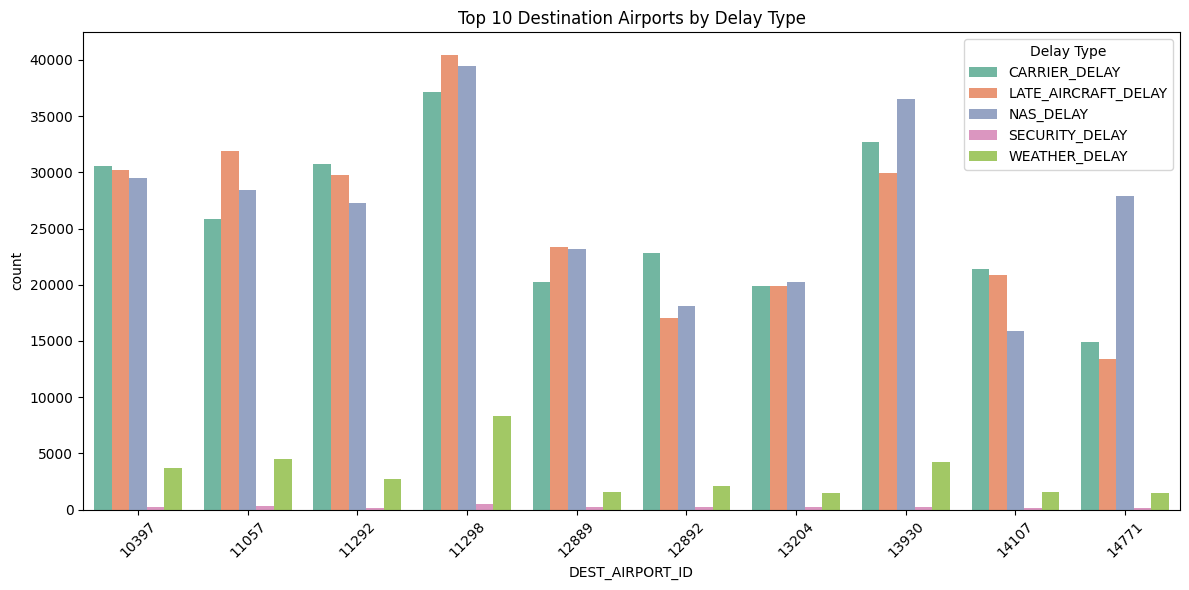

In [ ]:
delay_by_dest = (
    delay_long[delay_long['HAS_DELAY'] == 1]
    .groupby(['DEST_AIRPORT_ID', 'DELAY_TYPE'])
    .size()
    .reset_index(name='count')
)

top_airports = delay_by_dest.groupby('DEST_AIRPORT_ID')['count'].sum().nlargest(10).index
top_delays = delay_by_dest[delay_by_dest['DEST_AIRPORT_ID'].isin(top_airports)]

plt.figure(figsize=(12,6))
sns.barplot(
    data=top_delays,
    x='DEST_AIRPORT_ID',
    y='count',
    hue='DELAY_TYPE',
    palette='Set2'
)
plt.title('Top 10 Destination Airports by Delay Type')
plt.xticks(rotation=45)
plt.legend(title='Delay Type')
plt.tight_layout()
plt.show()

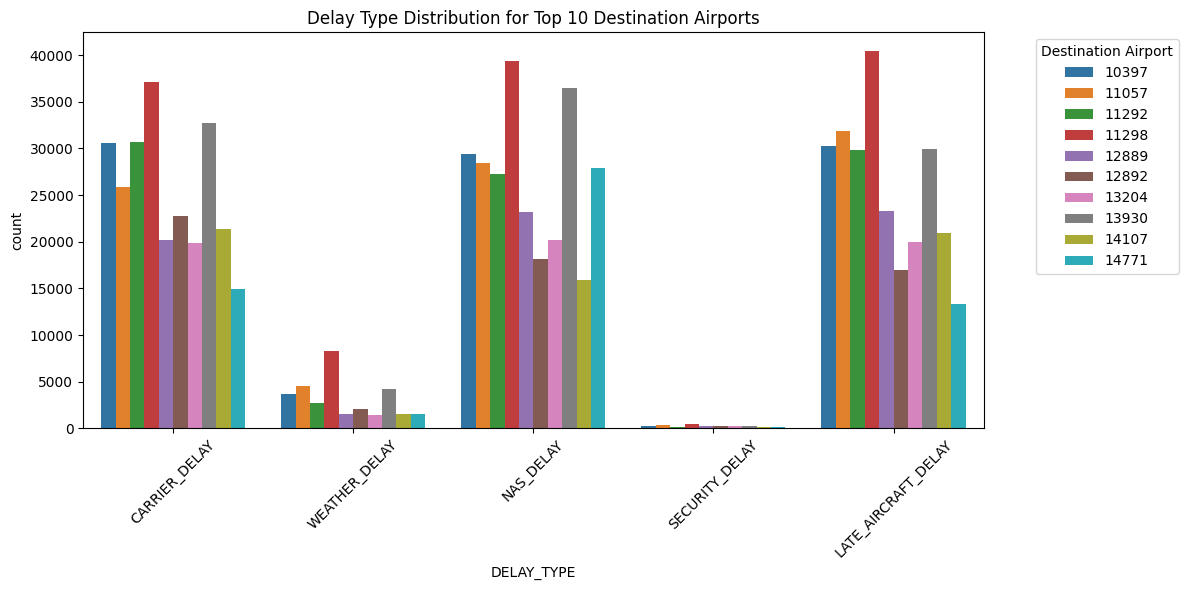

In [ ]:
top_airports = (
    delay_long[delay_long['HAS_DELAY'] == 1]
    .groupby('DEST_AIRPORT_ID')['HAS_DELAY']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index
)

plt.figure(figsize=(12,6))
sns.countplot(
    data=delay_long[(delay_long['HAS_DELAY'] == 1) & (delay_long['DEST_AIRPORT_ID'].isin(top_airports))],
    x='DELAY_TYPE',
    hue='DEST_AIRPORT_ID',
    palette='tab10'
)
plt.title('Delay Type Distribution for Top 10 Destination Airports')
plt.xticks(rotation=45)
plt.legend(title='Destination Airport', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

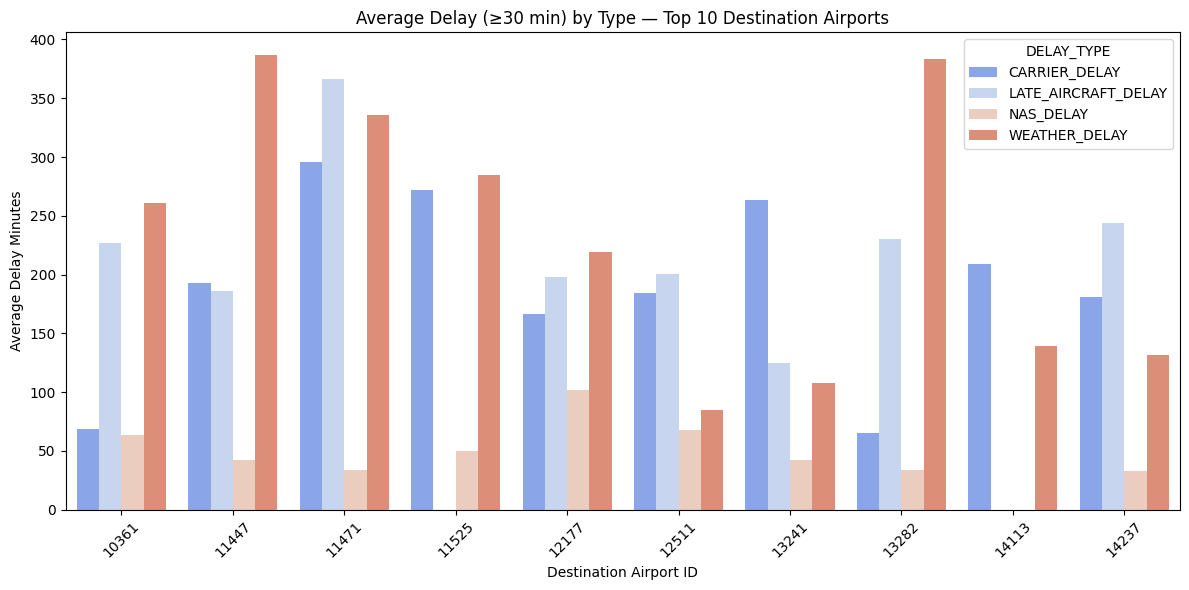

In [ ]:
# Filter for flights with delay > 0 or >= 30 if desired
delay_filtered = delay_long[delay_long['DELAY_MINUTES'] >= 30]

# Compute overall mean delay per airport (regardless of type)
top_airports = (
    delay_filtered.groupby('DEST_AIRPORT_ID')['DELAY_MINUTES']
    .mean()
    .nlargest(10)  # pick top 10 airports
    .index
)

# Now compute mean delay by type for those airports only
avg_delay_dest = (
    delay_filtered[delay_filtered['DEST_AIRPORT_ID'].isin(top_airports)]
    .groupby(['DEST_AIRPORT_ID', 'DELAY_TYPE'])['DELAY_MINUTES']
    .mean()
    .reset_index()
)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(
    data=avg_delay_dest,
    x='DEST_AIRPORT_ID',
    y='DELAY_MINUTES',
    hue='DELAY_TYPE',
    palette='coolwarm'
)
plt.title('Average Delay (≥30 min) by Type — Top 10 Destination Airports')
plt.xlabel('Destination Airport ID')
plt.ylabel('Average Delay Minutes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
"""
shows percentage of delayed flights by airline, can see it's pretty even between airlines, even if some airlines are
much bigger than others
"""

delay_airline = (
    delay_long.groupby('MKT_CARRIER_AIRLINE_ID')['HAS_DELAY']
      .agg(['mean', 'count'])
      .rename(columns={'mean': 'Pct_Delayed', 'count': 'Num_Flights'})
      .sort_values('Pct_Delayed', ascending=False)
)

delay_airline['Pct_Delayed'] = (delay_airline['Pct_Delayed'] * 100).round(2)
print(delay_airline.head(10))

                        Pct_Delayed  Num_Flights
MKT_CARRIER_AIRLINE_ID                          
20436                          9.01      1043120
20409                          8.84      1201410
20416                          7.81      1305515
19805                          7.61      9553625
20368                          7.08       586050
19393                          7.05      7097095
19930                          6.00      2025590
19977                          5.73      6821350
19790                          4.98      7708535
19690                          4.40       392650


In [ ]:
delay_origin = (
    delay_long.groupby('ORIGIN_AIRPORT_ID')['HAS_DELAY']
      .agg(['mean', 'count'])
      .rename(columns={'mean': 'Pct_Delayed', 'count': 'Num_Flights'})
      .sort_values('Pct_Delayed', ascending=False)
)

delay_origin['Pct_Delayed'] = (delay_origin['Pct_Delayed'] * 100).round(2)
print(delay_origin.head(30))

                   Pct_Delayed  Num_Flights
ORIGIN_AIRPORT_ID                          
14716                    13.67         2575
11027                    13.24         1035
12250                    12.57         1345
12119                    12.43         1480
14905                    12.08          530
13282                    11.35          185
15027                    10.33         5980
10551                    10.32         4120
12544                    10.18         3515
10268                    10.10         3375
12265                     9.97         1915
13303                     9.52       549720
14025                     9.42         2505
11624                     9.37        39850
11697                     9.35       459450
11298                     9.29      1578475
10754                     9.26         2085
15295                     8.91         1875
11057                     8.91      1262205
14843                     8.90       177155
14952                     8.63  

In [ ]:
delay_dest = (
    delay_long.groupby('DEST_AIRPORT_ID')['HAS_DELAY']
      .agg(['mean', 'count'])
      .rename(columns={'mean': 'Pct_Delayed', 'count': 'Num_Flights'})
      .sort_values('Pct_Delayed', ascending=False)
)

delay_dest['Pct_Delayed'] = (delay_dest['Pct_Delayed'] * 100).round(2)
print(delay_dest.head(20))

                 Pct_Delayed  Num_Flights
DEST_AIRPORT_ID                          
12119                  10.71         1475
14254                  10.29         4735
10732                  10.24        12225
12544                   9.20         3520
14761                   9.20        47505
11027                   9.18         1035
14314                   9.08        10940
14843                   9.07       177175
11721                   8.70        14780
15027                   8.65         5980
14771                   8.44       684565
10874                   8.42        17390
10136                   8.39         8785
10434                   8.35        15110
11111                   8.34        10650
11697                   8.27       459485
14027                   8.25       147720
12391                   8.20        23890
12197                   8.04        61660
14082                   8.03        31695


In [ ]:
"""
distance doesn't affect delay
"""

# Define distance buckets (you can adjust ranges)
bins = [0, 500, 1000, 1500, 2500, 4000]
labels = ['0–500', '501–1000', '1001–1500', '1501–2500', '2501–4000']

delay_long['DISTANCE_BUCKET'] = pd.cut(delay_long['DISTANCE'], bins=bins, labels=labels, include_lowest=True)

delay_distance = (
    delay_long.groupby('DISTANCE_BUCKET')['HAS_DELAY']
      .agg(['mean', 'count'])
      .rename(columns={'mean': 'Pct_Delayed', 'count': 'Num_Flights'})
)

delay_distance['Pct_Delayed'] = (delay_distance['Pct_Delayed'] * 100).round(2)
print(delay_distance)


/tmp/ipython-input-2588254614.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  delay_long.groupby('DISTANCE_BUCKET')['HAS_DELAY']


                 Pct_Delayed  Num_Flights
DISTANCE_BUCKET                          
0–500                   6.01     13904940
501–1000                6.77     13429330
1001–1500               7.38      5831240
1501–2500               6.91      3848675
2501–4000               6.06       695810
